# Transfer Learning Arsitektur CONVNEXT type base



# Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Non Augmentasi Data, Epoch 25, LR 1e-4

### Model

In [1]:
# Library
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import numpy as np

#Data
train_dir  = '/content/drive/MyDrive/Dataset Split/train'
val_dir = '/content/drive/MyDrive/Dataset Split/val'

#Parameter
batch_size = 32
lr=1e-4
epochs=10

#ImageDataGenerator & Augmentasi Data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    directory=train_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

val_data = valid_datagen.flow_from_directory(
    directory=val_dir,target_size=(224, 224),batch_size=batch_size,color_mode='rgb')

#base model
base_model = tf.keras.applications.convnext.ConvNeXtBase(
    weights='imagenet',   # Pre-trained weights ImageNet
    include_top=False,
    input_shape=(224, 224, 3)
)


#freeze layer terakhir dari base model untuk fine-tuning
base_model.trainable = True
for layer in base_model.layers[:-5]:   #5 Lapisan terakhir di Freeze
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='sigmoid')
])

#Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

#Callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#Training model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stopping])


Found 11729 images belonging to 10 classes.
Found 1472 images belonging to 10 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ convnext_base (Functional)           │ (None, 7, 7, 1024)          │      87,566,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,990,410 (358.54 MB)

 Trainable params: 10,622,346 (40.52 MB)

 Non-trainable params: 83,368,064 (318.02 MB)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


367/367 ━━━━━━━━━━━━━━━━━━━━ 4175s 11s/step - accuracy: 0.4764 - loss: 0.2738 - val_accuracy: 0.7351 - val_loss: 0.1382
Epoch 2/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 243s 644ms/step - accuracy: 0.7181 - loss: 0.1533 - val_accuracy: 0.7636 - val_loss: 0.1216
Epoch 3/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 224s 539ms/step - accuracy: 0.7774 - loss: 0.1233 - val_accuracy: 0.7751 - val_loss: 0.1129
Epoch 4/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 203s 546ms/step - accuracy: 0.8107 - loss: 0.1049 - val_accuracy: 0.7887 - val_loss: 0.1104
Epoch 5/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 205s 551ms/step - accuracy: 0.8346 - loss: 0.0918 - val_accuracy: 0.8043 - val_loss: 0.1052
Epoch 6/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 204s 547ms/step - accuracy: 0.8603 - loss: 0.0797 - val_accuracy: 0.8043 - val_loss: 0.1018
Epoch 7/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 260s 539ms/step - accuracy: 0.8794 - loss: 0.0688 - val_accuracy: 0.8016 - val_loss: 0.1043
Epoch 8/10
367/367 ━━━━━━━━━━━━━━━━━━━━ 199s 535ms/step - accuracy: 0.8930 - loss: 0.062

### Akurasi dan Evaluasi Model dengan Data Test

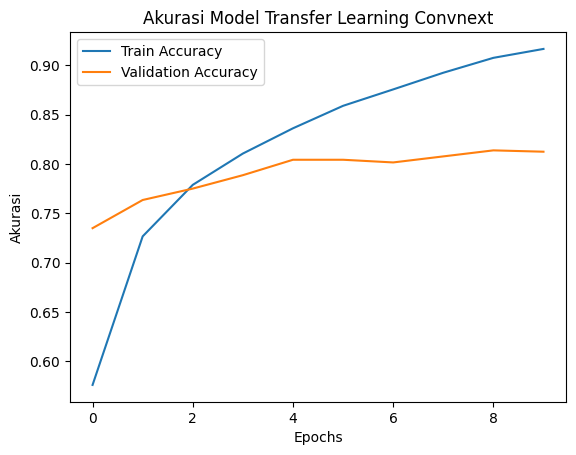

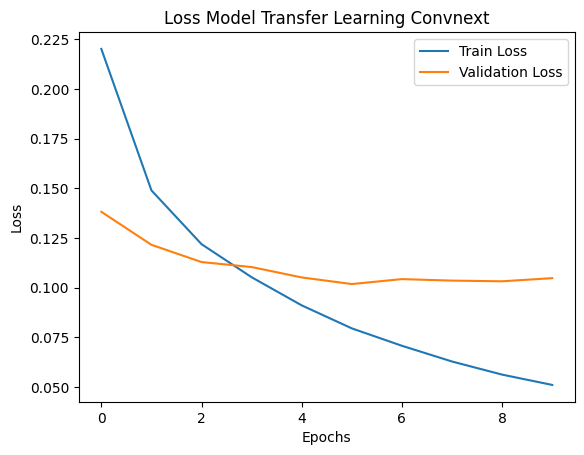

Found 1466 images belonging to 10 classes.
46/46 ━━━━━━━━━━━━━━━━━━━━ 505s 11s/step


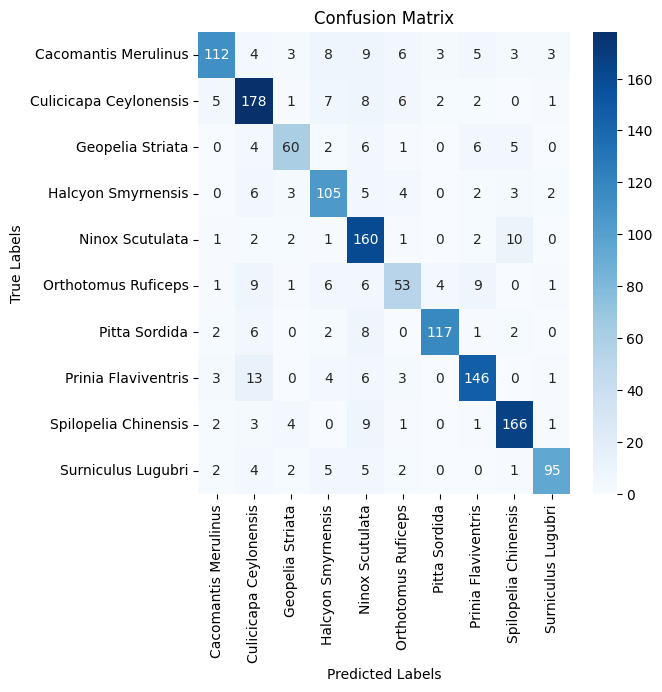

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79       156
           1       0.78      0.85      0.81       210
           2       0.79      0.71      0.75        84
           3       0.75      0.81      0.78       130
           4       0.72      0.89      0.80       179
           5       0.69      0.59      0.63        90
           6       0.93      0.85      0.89       138
           7       0.84      0.83      0.83       176
           8       0.87      0.89      0.88       187
           9       0.91      0.82      0.86       116

    accuracy                           0.81      1466
   macro avg       0.82      0.80      0.80      1466
weighted avg       0.82      0.81      0.81      1466

Accuracy per Class:
Cacomantis Merulinus: 71.79%
Culicicapa Ceylonensis: 84.76%
Geopelia Striata: 71.43%
Halcyon Smyrnensis: 80.77%
Ninox Scutulata: 89.39%
Orthotomus Ruficeps: 58.89%
Pitta Sordida: 84.78%
Prinia Flav

In [2]:
#Plot Training

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Akurasi Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Model Transfer Learning Convnext')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


test_dir= '/content/drive/MyDrive/Dataset Split/test'
test_datagen = ImageDataGenerator(rescale=1./255)

#Load data test
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=batch_size,
    color_mode='rgb',
    class_mode='binary',
    shuffle=False
)

#Prediksi model pada data test
predictions = model.predict(test_data, verbose=1)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_data.classes


#Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

#Visualisasi Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=test_data.class_indices.keys(),
            yticklabels=test_data.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Menampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(true_labels, predicted_labels))

# Menghitung akurasi per kelas
accuracyclass = cm.diagonal() / cm.sum(axis=1)

# Menampilkan akurasi per kelas
print("Accuracy per Class:")
for class_name, accuracy in zip(test_data.class_indices.keys(), accuracyclass):
    print(f"{class_name}: {accuracy * 100:.2f}%")


### Testing menggunakan data test

In [11]:
from tensorflow.keras.preprocessing import image
import numpy as np

#Path ke gambar input
image_path = '/content/drive/MyDrive/Dataset Split/test/Halcyon Smyrnensis/460165_chunk_4.png'

#Pre-processing gambar
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

#Prediksi  model
predicted_probabilities = model.predict(img_array, verbose=1)
predicted_class = np.argmax(predicted_probabilities, axis=1)[0]

#Mapping indeks ke kelas
class_indices = test_data.class_indices
class_labels = {v: k for k, v in class_indices.items()}
predicted_label = class_labels[predicted_class]

#Menampilkan hasil prediksi
print(f"kelas prediksi: {predicted_class}")
print(f"label prediksi: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
kelas prediksi: 3
label prediksi: Halcyon Smyrnensis


In [4]:
model.save("nonaugmentasi.h5")

In [7]:
model.save("/content/drive/MyDrive/nonaugmentasi.h5")

In [8]:
model.save("/content/drive/MyDrive/nonaugmentasi.hdf5")

In [5]:
model.save("/content/drive/MyDrive/nonaugmentasi.hdf5")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.332971 to fit



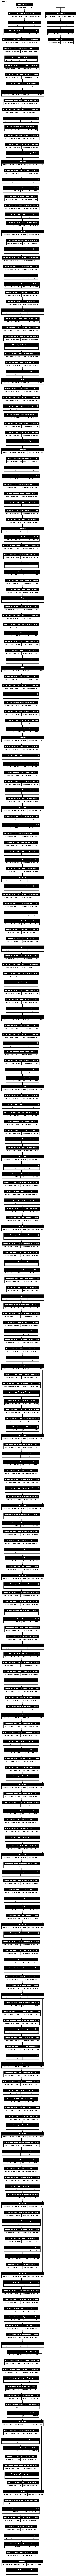

In [6]:
from tensorflow.keras.utils import plot_model

# Menyimpan diagram arsitektur model ke file
plot_model(
    model,
    to_file='modelCOVNEXT_architecture.png',
    show_shapes=True,
    show_layer_names=True,
    expand_nested=True
)
